Import Package

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Define Function 

In [2]:
def show(img_,text):
    print(text,img_.shape,np.amin(img_),np.amax(img_),img_.dtype)
    # plt.figure(figsize=(8,8))
    plt.imshow(img_)
    plt.title(text,fontsize=20)
    plt.xlabel(str(img_.shape))
    plt.ylabel(str(np.amin(img_))+' ~ '+str(np.amax(img_)))
    return

In [3]:
def precision_recall_f1(label,pred):
    pr_image = np.zeros((512,512,3))
    TP,FP,FN = 0,0,0
    for i in range(512):
        for j in range(512):
            if label[i,j] ==1 and pred[i,j] ==1:
                pr_image[i,j] = (255,255,255)
                TP +=1
            elif label[i,j] ==0 and pred[i,j] ==1:
                pr_image[i,j] = (0,255,0)
                FP +=1
            elif label[i,j] ==1 and pred[i,j] ==0:
                pr_image[i,j] = (255,0,0)
                FN +=1
            
    plt.imshow(pr_image.astype('uint8'))
    plt.axis('off')
    th_precision = TP/(TP+FP)
    th_recall =TP/(TP+FN)
    th_f1 = 2*((TP/(TP+FP))*(TP/(TP+FN)))/((TP/(TP+FP))+(TP/(TP+FN)))

    return th_precision,th_recall,th_f1

Read Label

label Mask (512, 512, 3) 0 255 uint8
label Mask (512, 512) 0 255 uint8
label Mask (512, 512) 0.0 1.0 float64
label Mask (512, 512) 0.0 1.0 float64


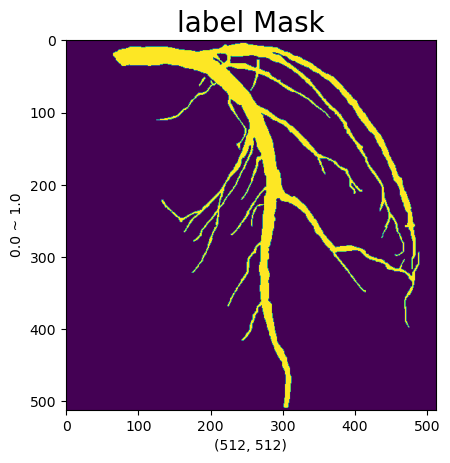

In [8]:
# raw_mask = cv2.imread('/content/CVAI-0113_RCA_LAO56_CRA1_27_Label.png',flags=cv2.IMREAD_UNCHANGED)
raw_mask2 = cv2.imread( 'cases_anser\case_02\CVAI-0029_RCA_LAO62_CRA2_34_mask_rgb.png' ,flags=cv2.IMREAD_UNCHANGED)
raw_mask3 = cv2.imread( 'cases_anser\case_03\CVAI-0213_LCX_LAO51_CRA23_34_mask_rgb.png' ,flags=cv2.IMREAD_UNCHANGED)
raw_mask4 = cv2.imread( 'cases_anser\case_04\CVAI-0294_LCX_LAO45_CRA15_37_mask_rgb.png' ,flags=cv2.IMREAD_UNCHANGED)
raw_mask5 = cv2.imread( 'cases_anser\case_05\CVAI-0338_RCA_LAO88_CRA0_23_mask_rgb.png' ,flags=cv2.IMREAD_UNCHANGED)
raw_mask6 = cv2.imread( 'cases_anser\case_06\CVAI-0501_LAD_RAO11_CRA29_57_mask_rgb.png' ,flags=cv2.IMREAD_UNCHANGED)

raw_mask = raw_mask6
# raw_mask = cv2.imread('作業解答')
show(raw_mask,'label Mask')
raw_mask = cv2.cvtColor(raw_mask,cv2.COLOR_BGR2GRAY)
show(raw_mask,'label Mask')
# raw_mask = raw_mask.astype(np.float32)
raw_mask = raw_mask/255
show(raw_mask,'label Mask')
raw_mask[raw_mask>=0.5] = 1
raw_mask[raw_mask<0.5] = 0
# raw_mask = raw_mask.astype(np.uint8)
show(raw_mask,'label Mask')

Read Test Image

test Mask (512, 512, 3) 0 255 uint8
test Mask (512, 512) 0.0 1.0 float64
test Mask (512, 512) 0.0 1.0 float64


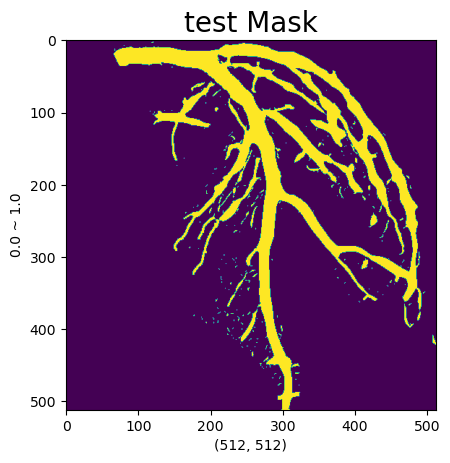

In [9]:
filename2 = 'cases/case_02/case02_label.png'
filename3 = 'cases/case_03/case03_label_255.png'
filename4 = 'cases/case_04/case04_label_255.png'
filename5 = 'cases/case_05/case05_label_255.png'
filename6  = 'cases/case_06/case06_label_255.png'

pred_image = cv2.imread(filename6)
show(pred_image,'test Mask')
pred_mask = cv2.cvtColor(pred_image,cv2.COLOR_BGR2GRAY)
# # raw_mask = raw_mask.astype(np.float32)
pred_mask = pred_mask/255
show(pred_mask,'test Mask')
# # raw_mask = raw_mask.astype(np.uint8)
pred_mask[pred_mask>=0.5] = 1
pred_mask[pred_mask<0.] = 0
show(pred_mask,'test Mask')


Show Both Label and Test Image

Ground Truth (512, 512) 0.0 1.0 float64
Prediction (512, 512) 0.0 1.0 float64


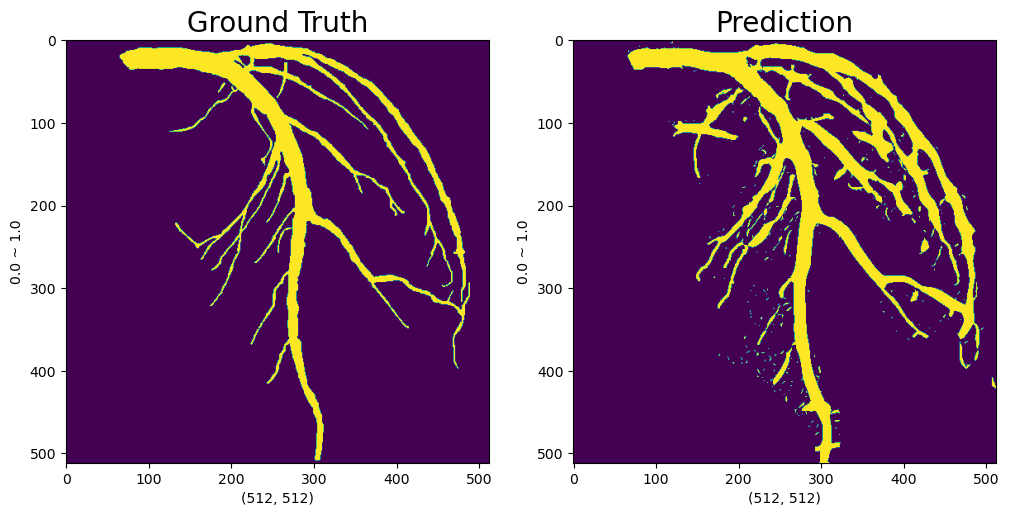

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
show(raw_mask,'Ground Truth')
plt.subplot(1,2,2)
show(pred_mask,'Prediction')

Calculate Precision, Recall and F1 score

Ground Truth (512, 512) 0.0 1.0 float64
Prediction (512, 512) 0.0 1.0 float64

Threshold = 0.2
Precision 0.6059751523051957, Recall 0.9327600327600327, F1 Score/Dice 0.7346675482591236


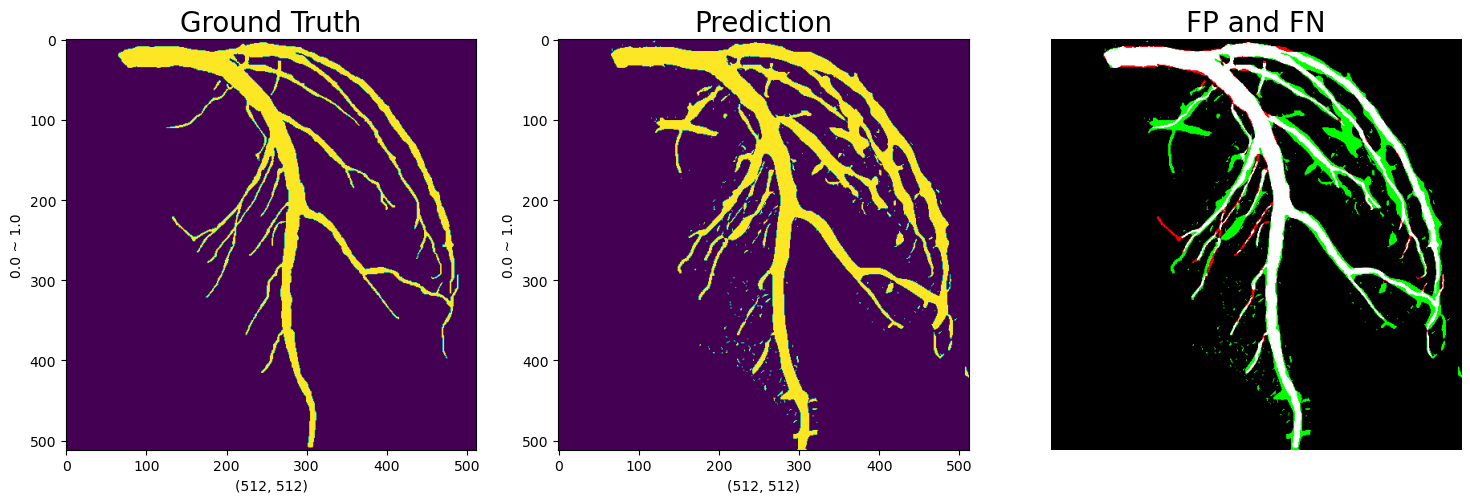

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
show(raw_mask,'Ground Truth')
plt.subplot(1,3,2)
show(pred_mask,'Prediction')
plt.subplot(1,3,3)
plt.title('FP and FN',fontsize=20)
pred_mask2 = pred_mask.copy()
threshold = 0.2
pred_mask2[pred_mask2>=threshold] = 1
pred_mask2[pred_mask2<threshold] = 0

precision_,recall_,f1_ = precision_recall_f1(raw_mask,pred_mask2)
print()
print('Threshold = {}'.format(threshold))
print("Precision {}, Recall {}, F1 Score/Dice {}".format(precision_,recall_,f1_))

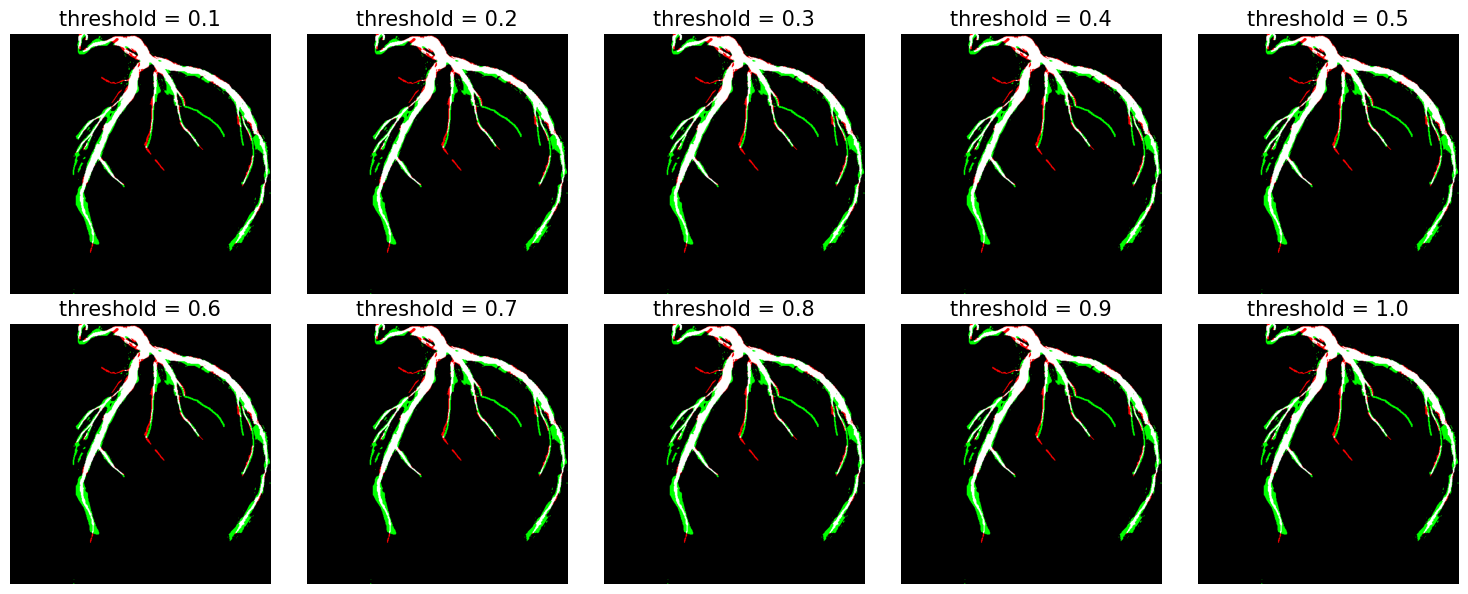

In [35]:
plt.figure(figsize=(15,6))
# Define probability thresholds to use, between 0 and 1
th_p,th_c,th_f = [],[],[]
# Find true positive / false positive rate for each threshold
for p in range(0,12):
    y_test = pred_mask.copy()
    threshold = round(p*0.1,2)
    y_test[y_test>=threshold] = 1
    y_test[y_test<threshold] = 0
    if p != 0 and p!=11:
      plt.subplot(2,5,p)
      plt.gca().set_title('threshold = {}'.format(round(p*0.1,1)),fontsize=15)
    if p == 11:
      precision, recall,f1 = 1,0,0
    else:
      precision, recall,f1 = precision_recall_f1(raw_mask,y_test)
    th_p.append(precision)
    th_c.append(recall)
    th_f.append(f1)

plt.tight_layout()

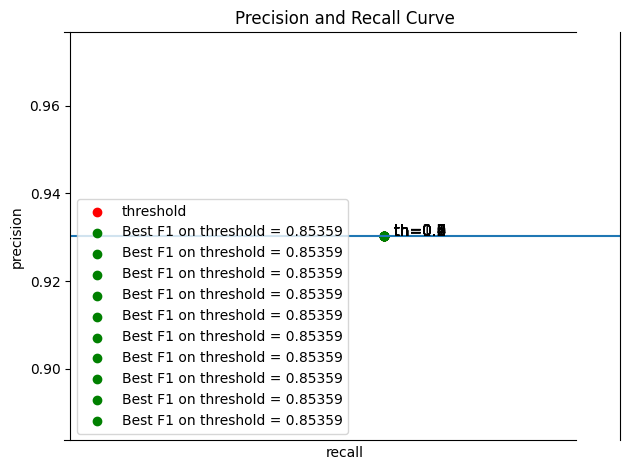

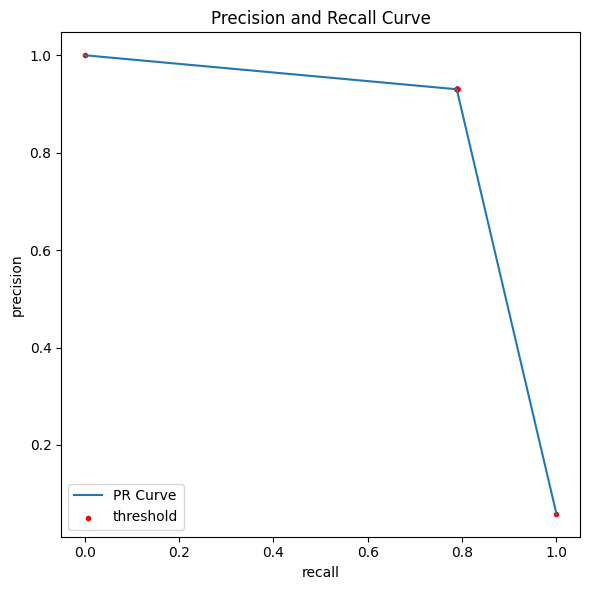

In [ ]:
plt.plot(th_c,th_p)
plt.scatter(th_c,th_p,c='r',label= 'threshold')
plt.xlim((np.mean(th_c[1:-1])-4*np.std(th_c[1:-1]),np.mean(th_c[1:-1])+4*np.std(th_c[1:-1])))
plt.ylim((np.mean(th_p[1:-1])-4*np.std(th_p[1:-1]),np.mean(th_p[1:-1])+4*np.std(th_p[1:-1])))
plt.xlabel('recall')
plt.ylabel('precision')
for i,f1 in enumerate(th_f):
  # plt.annotate('  th={}'.format(round(i*0.1,2)), (th_c[i], th_p[i]))
  if f1 == max(th_f):
      best_th = i*0.1
      plt.annotate('  th={}'.format(round(i*0.1,2)), (th_c[i], th_p[i]),fontsize=11)
      plt.scatter(th_c[i], th_p[i],c='g',label= 'Best F1 on threshold = {}'.format(round(f1,6)))
plt.legend(loc = 3)
plt.title('Precision and Recall Curve')
plt.tight_layout()


plt.figure(figsize=(6,6))
plt.plot(th_c,th_p,label= 'PR Curve')
plt.scatter(th_c,th_p,marker='.',c= 'r',label= 'threshold')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 3)
plt.title('Precision and Recall Curve')
plt.tight_layout()

F1 on best threshold = 1.0
Precision 0.930205773955774, Recall 0.7886342924098425, F1 Score/Dice 0.8535897977876419


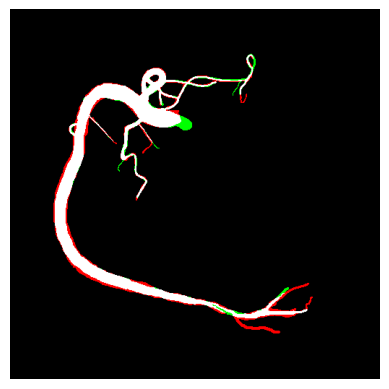

In [ ]:
pred_mask2 = pred_mask.copy()
threshold = round(best_th,2)
print('F1 on best threshold = {}'.format(threshold))
pred_mask2[pred_mask2>=threshold] = 1
pred_mask2[pred_mask2<threshold] = 0

precision_,recall_,f1_ = precision_recall_f1(raw_mask,pred_mask2)
print("Precision {}, Recall {}, F1 Score/Dice {}".format(precision_,recall_,f1_))
